In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

首先分析wine reviews数据集

1. 数据可视化和摘要

1.1 数据摘要


In [3]:
#导入数据
wine_1 = pd.read_csv("./winemag/winemag-data_first150k.csv")
wine_2 = pd.read_csv("./winemag/winemag-data-130k-v2.csv")
print(wine_1.shape,wine_2.shape)
print(wine_1.columns.values.tolist(),wine_2.columns.values.tolist()  ) #输出各列名


(150930, 11) (129971, 14)
['Unnamed: 0', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery'] ['Unnamed: 0', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


In [4]:
#合并数据
wine = pd.concat([wine_1, wine_2], ignore_index=True)
wine=wine.drop(labels='Unnamed: 0', axis=1)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                280833 non-null  object 
 1   description            280901 non-null  object 
 2   designation            197701 non-null  object 
 3   points                 280901 non-null  int64  
 4   price                  258210 non-null  float64
 5   province               280833 non-null  object 
 6   region_1               234594 non-null  object 
 7   region_2               111464 non-null  object 
 8   variety                280900 non-null  object 
 9   winery                 280901 non-null  object 
 10  taster_name            103727 non-null  object 
 11  taster_twitter_handle  98758 non-null   object 
 12  title                  129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 27.9+ MB


In [5]:
#去重
wine.duplicated().value_counts()
wine.drop_duplicates()
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


1.1.1 标称属性

In [19]:
#各标量数量
labels = ['country','province','region_1','region_2','variety','winery']
for label in labels:
    print(label+':\n')
    print(wine[label].value_counts())
    print('\n')

country:

US                        116901
France                     43191
Italy                      43018
Spain                      14913
Portugal                   11013
Chile                      10288
Argentina                   9431
Australia                   7286
Austria                     6402
New Zealand                 4739
Germany                     4617
South Africa                3659
Greece                      1350
Israel                      1135
Canada                       453
Hungary                      377
Romania                      259
Bulgaria                     218
Uruguay                      201
Slovenia                     181
Croatia                      162
Turkey                       142
Mexico                       133
Moldova                      130
Georgia                      129
England                       83
Brazil                        77
Lebanon                       72
Cyprus                        42
Morocco                       40


1.1.2数值属性

In [20]:
#wine reviews的数据集数值属性包括points 和 price
#其五数概括如下
wine.describe()

,points,price
count,280901.000000,258210.000000
mean,88.146934,34.177162
std,3.151528,38.611708
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,3300.000000


min 25% 50% 75% max 就是point和price这两个数值属性的五数概括

In [21]:
#每一列缺失值个数统计如下
wine.isnull().sum(axis=0)

country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
variety                       1
winery                        0
taster_name              177174
taster_twitter_handle    182143
title                    150930
dtype: int64

1.2数据可视化

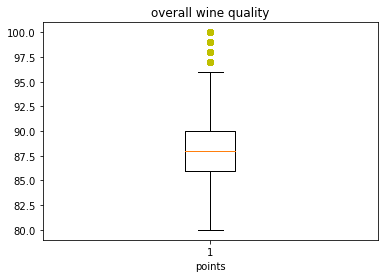

In [33]:
#检查数据分布即离群点，首先过滤price的缺失值，盒图进行可视化
plt.boxplot(wine['points'], notch=False, sym='y', vert=True)
plt.xlabel('points')
plt.title('overall wine quality')
plt.show()

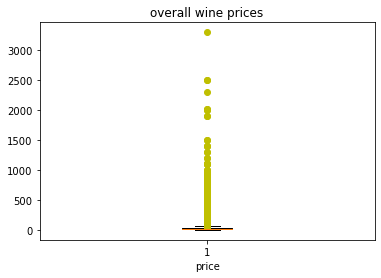

In [35]:
plt.boxplot(wine['price'].dropna(), notch=False, sym='y', vert=True)
plt.xlabel('price')
plt.title('overall wine prices')
plt.show()

price集中在某一小范围内。有大量离群点

[88.16610636350416, 88.884559283184, 88.48114742665861, 86.93254207738215, 88.15717788068646, 86.3822900466563, 86.28385112925459, 88.11240735657425, 89.70759137769447, 87.77843426883308]


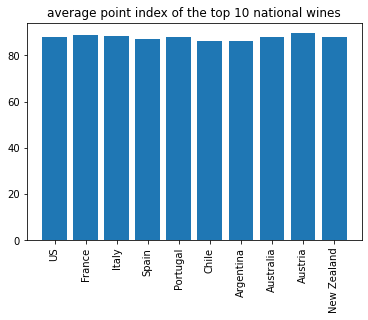

In [37]:
#统计销量前十的国家
Countries = wine['country'].value_counts()[:10]
country = Countries.index
mean_points=[]
for c in country:
    temp = wine.loc[wine['country']==c]
    sum_points = temp['points'].sum()
    mean_points.append(sum_points*1.0/Countries[c])
print(mean_points)
    
plt.bar(country, mean_points)
plt.xticks(rotation=90)
plt.title('average point index of the top 10 national wines')
plt.show()

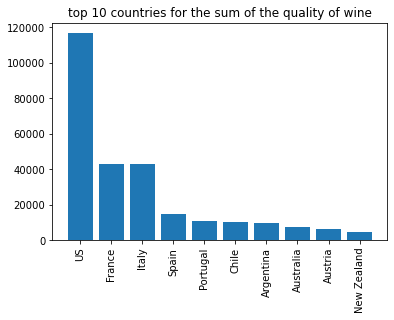

In [38]:
points = [Countries[i] for i in range(10)]
plt.bar(country, points)
plt.xticks(rotation=90)
plt.title('top 10 countries for the sum of the quality of wine')
plt.show()

count    258210.000000
mean         34.177162
std          38.611708
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64


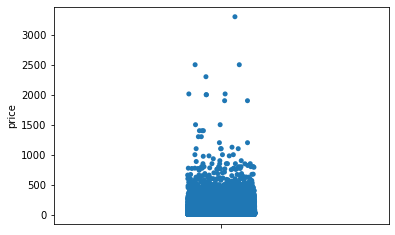

In [40]:
print(wine['price'].describe())
#画出price的分布散点图
sns.stripplot(y='price', data=wine)
plt.show()

价格的均值为34.17，最大值为3300，最小值为4

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


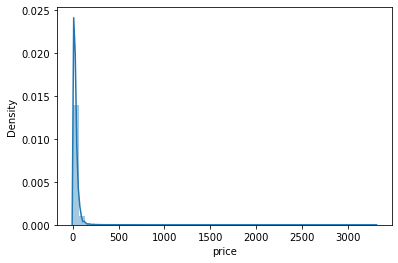

In [41]:
#画price的直方图与核概率密度图 过滤缺失值 
sns.distplot(wine.price.dropna())
plt.show()

价格分布较为集中，主要分布在0-200之间

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Grüner Veltliner'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Chardonnay'),
  Text(3, 0, 'Bordeaux-style Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Bordeaux-style Red Blend'),
  Text(6, 0, 'Bordeaux-style Red Blend'),
  Text(7, 0, 'Bordeaux-style Red Blend'),
  Text(8, 0, 'Chardonnay'),
  Text(9, 0, 'Chardonnay'),
  Text(10, 0, 'Bordeaux-style Red Blend'),
  Text(11, 0, 'Bordeaux-style Red Blend'),
  Text(12, 0, 'Bordeaux-style Red Blend'),
  Text(13, 0, 'Bordeaux-style Red Blend'),
  Text(14, 0, 'Bordeaux-style Red Blend'),
  Text(15, 0, 'Bordeaux-style Red Blend'),
  Text(16, 0, 'Bordeaux-style Red Blend'),
  Text(17, 0, 'Grüner Veltliner'),
  Text(18, 0, 'Pinot Noir'),
  Text(19, 0, 'Bordeaux-style Red Blend'),
  Text(20, 0, 'Bordeaux-style Red Blend'),
  Text(21, 0, 'Pinot Noir'),
  Text(22, 0, 'Pinot Noir'),
  Text(23, 0, 'Chardo

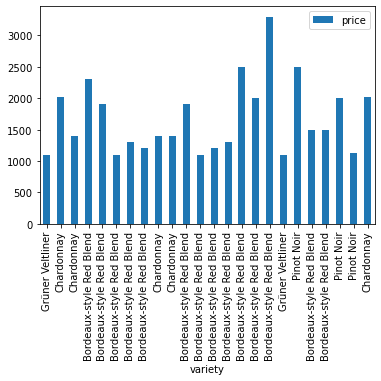

In [45]:
#讨论高价的酒与其原料的关系
High_price = wine[wine.price>1000]
temp = High_price[['price','variety']]
temp.plot(kind='bar', x='variety', y='price')
plt.xticks(rotation=90)

不同原料酿造的酒价格不同，因此可以判断相关

2.数据缺失的处理

               count      freq
US            116901  0.418053
France         43191  0.154457
Italy          43018  0.153838
Spain          14913  0.053331
Portugal       11013  0.039384
Chile          10288  0.036791
Argentina       9431  0.033726
Australia       7286  0.026056
Austria         6402  0.022894
New Zealand     4739  0.016947
Germany         4617  0.016511
South Africa    3659  0.013085
Greece          1350  0.004828
Israel          1135  0.004059
Canada           453  0.001620
Hungary          377  0.001348
Romania          259  0.000926
Bulgaria         218  0.000780
Uruguay          201  0.000719
Slovenia         181  0.000647


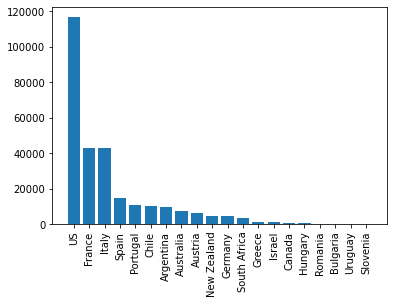

In [48]:
#定义 标称属性数据基本信息及可视化数据函数
def Re_Visualize(Series):
    data = Series.value_counts()
    name = data.index[:20]
#     counts = [data[name[i]] for i in range(len(data))]
    counts = [data[name[i]] for i in range(20)]
    frequence = [counts[i]/sum(counts) for i in range(20)]
    dataframe = pd.DataFrame(counts, index=name, columns=['count'])
    dataframe['freq'] = frequence
    print(dataframe)
    plt.bar(name, counts)
    plt.xticks(rotation=90)
    plt.show()  #wine['country']的原始数据
    
Re_Visualize(wine['country'])

               count      freq
US            116901  0.418053
France         43191  0.154457
Italy          43018  0.153838
Spain          14913  0.053331
Portugal       11013  0.039384
Chile          10288  0.036791
Argentina       9431  0.033726
Australia       7286  0.026056
Austria         6402  0.022894
New Zealand     4739  0.016947
Germany         4617  0.016511
South Africa    3659  0.013085
Greece          1350  0.004828
Israel          1135  0.004059
Canada           453  0.001620
Hungary          377  0.001348
Romania          259  0.000926
Bulgaria         218  0.000780
Uruguay          201  0.000719
Slovenia         181  0.000647


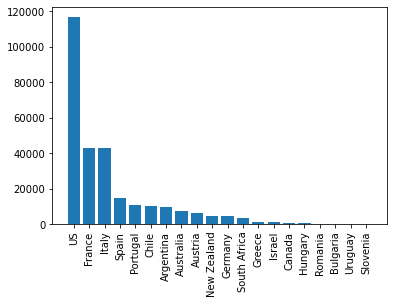

In [49]:
#处理缺失值的方式1:剔除缺失值
country_1 = wine['country'].dropna()
Re_Visualize(country_1)

               count      freq
US            116969  0.418194
France         43191  0.154419
Italy          43018  0.153801
Spain          14913  0.053318
Portugal       11013  0.039374
Chile          10288  0.036782
Argentina       9431  0.033718
Australia       7286  0.026049
Austria         6402  0.022889
New Zealand     4739  0.016943
Germany         4617  0.016507
South Africa    3659  0.013082
Greece          1350  0.004827
Israel          1135  0.004058
Canada           453  0.001620
Hungary          377  0.001348
Romania          259  0.000926
Bulgaria         218  0.000779
Uruguay          201  0.000719
Slovenia         181  0.000647


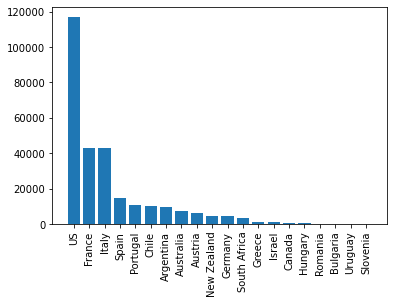

In [53]:
#处理缺失值方式2：高频填充（众数）
country_2 = wine['country'].fillna(wine['country'].mode()[0])
Re_Visualize(country_2)

填充后，与初始相比，存在缺失数据的国家。count和freq数据量有所增长

处理designation属性

In [63]:
print('sum of null:'+ str(wine['designation'].isnull().sum())+'\n')
print('value_count:\n'+str(wine['designation'].value_counts())+'\n')

sum of null:83200

value_count:
Reserve                  4761
Reserva                  3069
Estate                   2893
Barrel sample            1701
Riserva                  1452
                         ... 
C5 Stefani Vineyard         1
Wrekin Vineyard             1
White Stones Adrianna       1
Vigneto Santa Cecilia       1
Proprietor Reserve          1
Name: designation, Length: 47239, dtype: int64



                      count      freq
Reserve                4761  0.203880
Reserva                3069  0.131423
Estate                 2893  0.123887
Barrel sample          1701  0.072842
Riserva                1452  0.062179
Brut                   1137  0.048690
Estate Grown           1070  0.045820
Barrel Sample           891  0.038155
Crianza                 846  0.036228
Dry                     787  0.033702
Estate Bottled          738  0.031603
Gran Reserva            591  0.025308
Old Vine                552  0.023638
Vieilles Vignes         533  0.022825
Brut Rosé               524  0.022439
Extra Dry               448  0.019185
Tradition               379  0.016230
Rosé                    346  0.014817
Réserve                 319  0.013661
Bien Nacido Vineyard    315  0.013489


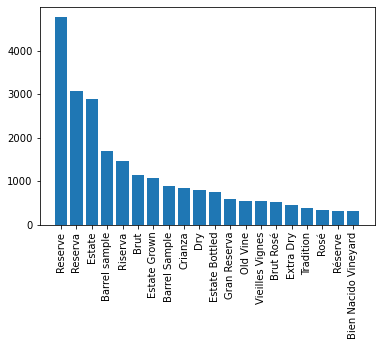

In [64]:
#可视化原始数据
Re_Visualize(wine['designation'])

                      count      freq
Reserve                4761  0.203880
Reserva                3069  0.131423
Estate                 2893  0.123887
Barrel sample          1701  0.072842
Riserva                1452  0.062179
Brut                   1137  0.048690
Estate Grown           1070  0.045820
Barrel Sample           891  0.038155
Crianza                 846  0.036228
Dry                     787  0.033702
Estate Bottled          738  0.031603
Gran Reserva            591  0.025308
Old Vine                552  0.023638
Vieilles Vignes         533  0.022825
Brut Rosé               524  0.022439
Extra Dry               448  0.019185
Tradition               379  0.016230
Rosé                    346  0.014817
Réserve                 319  0.013661
Bien Nacido Vineyard    315  0.013489


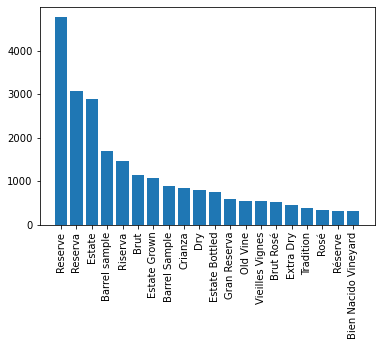

In [65]:
#处理缺失值的方式1:剔除缺失值
designation_1 = wine['designation'].dropna()
Re_Visualize(designation_1)

                      count      freq
Reserve               87961  0.825522
Reserva                3069  0.028803
Estate                 2893  0.027151
Barrel sample          1701  0.015964
Riserva                1452  0.013627
Brut                   1137  0.010671
Estate Grown           1070  0.010042
Barrel Sample           891  0.008362
Crianza                 846  0.007940
Dry                     787  0.007386
Estate Bottled          738  0.006926
Gran Reserva            591  0.005547
Old Vine                552  0.005181
Vieilles Vignes         533  0.005002
Brut Rosé               524  0.004918
Extra Dry               448  0.004205
Tradition               379  0.003557
Rosé                    346  0.003247
Réserve                 319  0.002994
Bien Nacido Vineyard    315  0.002956


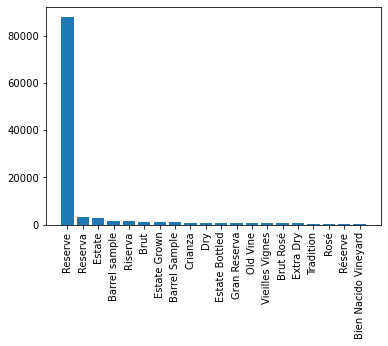

In [66]:
#处理缺失值方式2：高频填充（众数）
designation_2 = wine['designation'].fillna(wine['designation'].mode()[0])
Re_Visualize(designation_2)

分析crime record数据集

1.数据摘要与可视化

1.1 数据摘要

In [69]:
#将2011至2016年所有数据整合
crime_data = pd.DataFrame()
for i in range(2011,2017):
    path = "./crime_record/records-for-" + str(i) + ".csv"
    crime_i = pd.read_csv(path)
    crime_data = pd.concat([crime_i,crime_data])
    
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046388 entries, 0 to 180015
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Agency                     1046384 non-null  object 
 1   Create Time                1046384 non-null  object 
 2   Location                   483425 non-null   object 
 3   Area Id                    864023 non-null   object 
 4   Beat                       1040583 non-null  object 
 5   Priority                   1046384 non-null  float64
 6   Incident Type Id           1046384 non-null  object 
 7   Incident Type Description  1045996 non-null  object 
 8   Event Number               1046384 non-null  object 
 9   Closed Time                1046359 non-null  object 
 10  Location 1                 374799 non-null   object 
 11  Zip Codes                  352 non-null      float64
 12  Location                   188052 non-null   object 
dtypes: float64(2)

In [71]:
crime_data.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time,Location 1,Zip Codes,Location
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000,NaN,NaN,NaN
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000,NaN,NaN,NaN
2,OP,2016-01-01T00:01:43.000,ST&CHESTNUT ST,P1,02X,2.0,415GS,415 GUNSHOTS,LOP160101000008,2016-01-01T00:21:24.000,NaN,NaN,NaN
3,OP,2016-01-01T00:01:48.000,WALLACE ST,P2,18Y,2.0,415GS,415 GUNSHOTS,LOP160101000007,2016-01-01T01:15:03.000,NaN,NaN,NaN
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000,NaN,NaN,NaN


1.1.1 标称属性

In [75]:
labels = ['Location','Area Id','Incident Type Id']
for label in labels:
    print(str(label)+':\n')
    print(str(crime_data[label].value_counts())+'\n')

Location:

 INTERNATIONAL BLVD                     5851
 AV&INTERNATIONAL BLVD                  4935
 MACARTHUR BLVD                         4918
 BROADWAY                               3879
 INTERNATIONAL BLVD                     3866
                                        ... 
BUELL AV&E 8TH ST                          1
BROADWAY&WATER AV&MACARTHUR BLVD           1
INTERNATIONAL 26TH ST                      1
45TH ST&CHESTNUT ST                        1
27TH AV&B ST                               1
Name: Location, Length: 83872, dtype: int64

Area Id:

1.0    290452
2.0    236700
P3     129054
P1     114560
P2      53033
3.0     32907
POU      5960
PCW       789
5.0       320
4.0       236
TEC        10
JLS         1
WAG         1
Name: Area Id, dtype: int64

Incident Type Id:

933R     98497
SECCK    70965
415      66720
911H     54935
10851    47958
         ...  
963          1
SUB          1
PGE          1
148_1        1
270C         1
Name: Incident Type Id, Length: 288, dtype: 

1.2数据可视化

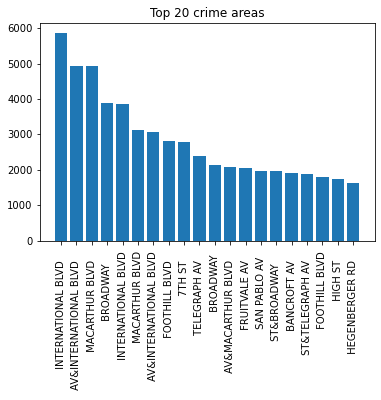

In [79]:
#显示犯罪最多的20个地区
locations = crime_data.Location.value_counts()[:20]
loc = locations.index
num = [locations[i] for i in range(20)]
plt.bar(loc, num)
plt.xticks(rotation = 90)
plt.title('Top 20 crime areas')
plt.show()

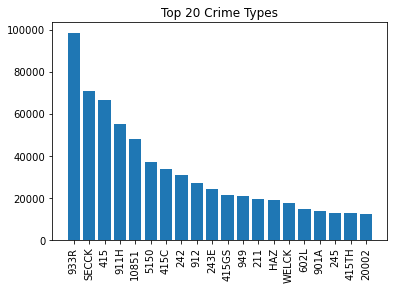

In [82]:
#最多的20种犯罪类型
crime_types = crime_data['Incident Type Id'].value_counts()[:20]
type_ids = crime_types.index
num = [crime_types[i] for i in range(20)]
plt.bar(type_ids, num)
plt.xticks(rotation = 90)
plt.title('Top 20 Crime Types')
plt.show()

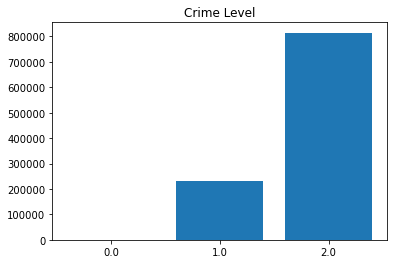

In [83]:
#犯罪等级统计
prioritys = crime_data['Priority'].value_counts()
priority_name = prioritys.index
num = [prioritys[i] for i in range(len(prioritys))]
plt.bar(['0.0','1.0','2.0'], num)
plt.title('Crime Level')
plt.show()

2.缺失值处理

In [84]:
crime_data.isnull().sum()

Agency                             4
Create Time                        4
Location                      562963
Area Id                       182365
Beat                            5805
Priority                           4
Incident Type Id                   4
Incident Type Description        392
Event Number                       4
Closed Time                       29
Location 1                    671589
Zip Codes                    1046036
Location                      858336
dtype: int64

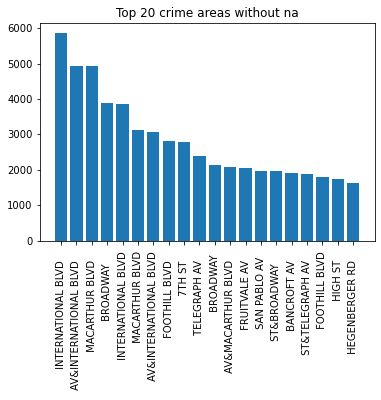

In [87]:
#处理Location为例
location_1 = crime_data.Location.dropna()
#可视化剔除后的数据
dropna_locs = location_1.value_counts()[:20]
dropna_locs_name = dropna_locs.index
dropna_locs_num = [dropna_locs[i] for i in range(20)]
plt.bar(dropna_locs_name,dropna_locs_num)
plt.xticks(rotation = 90)
plt.title('Top 20 crime areas without na')
plt.show()

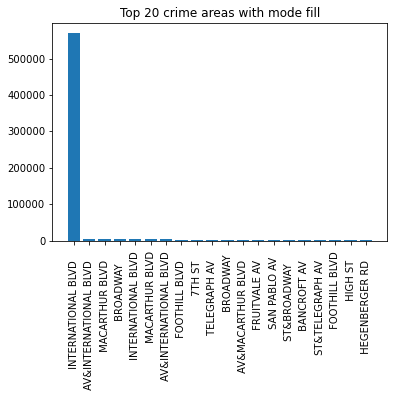

In [94]:
#高频填充
location_2 = crime_data.Location.fillna(crime_data.Location.mode()[0]) 
#可视化高频填充后的数据
fill_locs = location_2.value_counts()[:20]
fill_locs_name = fill_locs.index
fill_locs_num = [fill_locs[i] for i in range(20)]
plt.bar(fill_locs_name, fill_locs_num)
plt.xticks(rotation = 90)
plt.title('Top 20 crime areas with mode fill')
plt.show()

In [ ]:
|